<a href="https://colab.research.google.com/github/yankunsong/Spark_learning/blob/main/Working_with_DF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Working with DF (DataFrame)**

**`Udemy Course: Best Hands-on Big Data Practices and Use Cases using PySpark`**

**`Author: Amin Karami (PhD, FHEA)`**

---

**DataFrame (DF)**: Schema (named columns) + declarative language. A DataFrame is a Dataset organized into named columns. It is conceptually equivalent to a table in a relational database. DataFrames can be constructed from a wide array of sources such as: structured data files, tables in Hive, external databases, or existing RDDs. It is very efficient for strucutred data.

source: https://spark.apache.org/docs/latest/sql-programming-guide.html

source: https://spark.apache.org/docs/latest/api/python/reference/

In [1]:
########## ONLY in Colab ##########
!pip3 install pyspark
########## ONLY in Colab ##########

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 21.2 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=2dda734bfde28f8f019c04815be362dc2fd3ebe3779c76e8fac873ee5050fdea
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [ ]:
########## ONLY in Ubuntu Machine ##########
# Load Spark engine
!pip3 install -q findspark
import findspark
findspark.init()
########## ONLY in Ubuntu Machine ##########

In [2]:
# Linking with Spark (https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql.html)
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

spark

# **Part 1: Create DF and Basic Operations**

In [3]:
# Create/Load DF: (Spark automatically scans through the files and infers the schema of the dataset)
# data source: https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset

df1 = spark.read.format("csv").load("CompleteDataset.csv", inferSchema=True, header=True)

In [4]:
# Show data:
df1.show(5)

+---+-----------------+---+--------------------+-----------+--------------------+-------+---------+-------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|_c0|             Name|Age|               Photo|Nationality|                Flag|Overall|Potential|               Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handling|

In [5]:
# How many partitions in DF?
df1.rdd.getNumPartitions()

2

In [6]:
# Increase/Desrease the partitions in DF
df2 = df1.repartition(4)
df2.rdd.getNumPartitions()

4

In [7]:
# Show DF
df2.show()

+-----+-------------+---+--------------------+-------------+--------------------+-------+---------+--------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|  _c0|         Name|Age|               Photo|  Nationality|                Flag|Overall|Potential|                Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handlin

In [8]:
# Rename Columns and Amend NULLs:
df2 = df2.withColumnRenamed("_c0", "ID") \
    .withColumnRenamed("Ball control", "Ball_Control")\
    .withColumnRenamed("Sliding tackle", "Sliding_Tackle")

df2.na.fill({"RAM": 10, "RB": 1}).show()

+-----+-------------+---+--------------------+-------------+--------------------+-------+---------+--------------------+--------------------+------+-----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|   ID|         Name|Age|               Photo|  Nationality|                Flag|Overall|Potential|                Club|           Club Logo| Value| Wage|Special|Acceleration|Aggression|Agility|Balance|Ball_Control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK handlin

In [9]:
# Transformation (SELECT):
df2.select("Name","Overall").distinct().show()

+------------------+-------+
|              Name|Overall|
+------------------+-------+
|        E. Horvath|     71|
|        M. Randall|     62|
|      A. Granqvist|     80|
|       A. Thompson|     65|
|    R. Cornthwaite|     66|
|         G. Zajkov|     62|
|       J. Cuadrado|     82|
|           M. Dube|     63|
|      A. Al Asmari|     62|
|           T. Aoki|     64|
|        M. Edwards|     58|
|           L. Amos|     60|
|       S. Kawamata|     56|
|A. Taylor-Sinclair|     60|
|       A. Bouchard|     60|
|        J. Cortizo|     58|
|     Fran Villalba|     70|
|         V. Lazaro|     71|
|         Guillermo|     70|
|         T. Ayasse|     68|
+------------------+-------+
only showing top 20 rows



In [10]:
# Transformation (FILTER):
df2.filter(df2["Overall"] > 70).show()

+----+------------+---+--------------------+-------------------+--------------------+-------+---------+--------------------+--------------------+-----+----+-------+------------+----------+-------+-------+------------+---------+--------+-----+---------+---------+------------------+---------+-----------+----------+--------------+-----------+----------------+-------------+-------+------------+----------+-------+---------+-----------+---------+-------------+----------+--------------+------------+-------+---------------+--------+------+-------+----+----+----+----+----+------+----+----+----+----+----+----+----+----+----+----+-------------------+----+----+----+----+----+----+----+----+----+----+----+
|  ID|        Name|Age|               Photo|        Nationality|                Flag|Overall|Potential|                Club|           Club Logo|Value|Wage|Special|Acceleration|Aggression|Agility|Balance|Ball_Control|Composure|Crossing|Curve|Dribbling|Finishing|Free kick accuracy|GK diving|GK han

In [ ]:
# Transformation (FILTER):
df2.select("Overall", "Name", "Age").where(df2["Overall"]>70).show()

In [11]:
# Transformation (FILTER):
df2.where(df2["Overall"]>70).groupBy("Age").count().sort("Age").show()

+---+-----+
|Age|count|
+---+-----+
| 17|    1|
| 18|   13|
| 19|   41|
| 20|  105|
| 21|  160|
| 22|  246|
| 23|  296|
| 24|  369|
| 25|  486|
| 26|  418|
| 27|  444|
| 28|  395|
| 29|  474|
| 30|  359|
| 31|  272|
| 32|  206|
| 33|  283|
| 34|  101|
| 35|   74|
| 36|   57|
+---+-----+
only showing top 20 rows



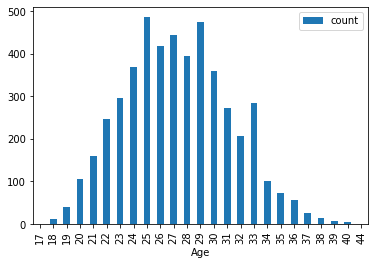

In [12]:
# Visualize the results:
df2_result = df2.where(df2["Overall"]>70).groupBy("Age").count().sort("Age")

pandas_df = df2_result.toPandas()
pandas_df.plot(x = "Age", y = "count", kind = "bar")


In [ ]:
pandas_df.sort_values(by="count", ascending=False).plot(x = "Age", y = "count", kind = "bar")

# **Part 2: Advanced DF Operations: Spark SQL and UDF**

In [13]:
# Spark SQL (Register the DF using a local temporary view):

df2.createOrReplaceTempView("df_football")

In [14]:
# SQL Query:

sql_query = """ SELECT Age, count(*) as Count
                FROM df_football
                WHERE Overall > 70
                GROUP BY Age
                ORDER BY Age """

result = spark.sql(sql_query)
result.show()

+---+-----+
|Age|Count|
+---+-----+
| 17|    1|
| 18|   13|
| 19|   41|
| 20|  105|
| 21|  160|
| 22|  246|
| 23|  296|
| 24|  369|
| 25|  486|
| 26|  418|
| 27|  444|
| 28|  395|
| 29|  474|
| 30|  359|
| 31|  272|
| 32|  206|
| 33|  283|
| 34|  101|
| 35|   74|
| 36|   57|
+---+-----+
only showing top 20 rows



In [16]:
# UDF (User Defined Functions):
def uppercase_converter(record):
    if not record:
        return
    if len(record) > 10:
        return record.upper()
    else:
        return record.lower()

# register the DF
df2.createOrReplaceTempView("UDF_football")

# register the function
spark.udf.register("UPPER", uppercase_converter)

# use the UDF in SQL
sql_query = "SELECT Age, UPPER(Name) as Name, UPPER(Club) as Club FROM UDF_football"

result = spark.sql(sql_query)
result.show()


+---+-----------------+--------------------+
|Age|             Name|                Club|
+---+-----------------+--------------------+
| 26|         v. moren|    WAASLAND-BEVEREN|
| 33|        c. agoste|UNIVERSIDAD CATÓLICA|
| 19|    STEVEN PRIETO|         REAL OVIEDO|
| 21|        c. alemán|ESTUDIANTES DE LA...|
| 27|       p. wiegers|   SG DYNAMO DRESDEN|
| 26|     H. YAMAGUCHI|        CEREZO OSAKA|
| 29|    D. MCGOLDRICK|        IPSWICH TOWN|
| 24|       r. teibert|VANCOUVER WHITECA...|
| 20|          i. radu|            avellino|
| 28|   P. ABRAHAMSSON|           bk häcken|
| 21|       c. burgess|   SCUNTHORPE UNITED|
| 31|            galán|      RAYO VALLECANO|
| 25|       r. andrero|      AUDAX ITALIANO|
| 31|         m. topal|       FENERBAHÇE SK|
| 23|        l. moneta|      LEGIA WARSZAWA|
| 21|        t. szántó|       SK RAPID WIEN|
| 23|          y. njie|         BOAVISTA FC|
| 20|     AARÓN MARTÍN|        RCD ESPANYOL|
| 23|K. FRIESENBICHLER|     FK AUSTRIA WIEN|
| 20|     